In [1]:
%matplotlib inline
# IMPORTS UTILES
import sys
print("Python version:", sys.version)

import pandas as pd
print("pandas version:", pd.__version__)

import matplotlib
print("matplotlib version:", matplotlib.__version__)

import numpy as np
print("NumPy version:", np.__version__)

import scipy as sp
print("SciPy version:", sp.__version__)

import IPython
print("IPython version:", IPython.__version__)

import sklearn
print("scikit-learn version:", sklearn.__version__)

import matplotlib.pyplot as plt
print("matplotlib version:", matplotlib.__version__)

import mglearn
print("mglearn version:", mglearn.__version__)

from sklearn.datasets import make_blobs

Python version: 3.9.12 (main, Apr  4 2022, 05:22:27) [MSC v.1916 64 bit (AMD64)]
pandas version: 1.4.2
matplotlib version: 3.5.1
NumPy version: 1.21.5
SciPy version: 1.7.3
IPython version: 8.2.0
scikit-learn version: 1.0.2
matplotlib version: 3.5.1
mglearn version: 0.1.9


# Apprentissage supervisé

## Présentation de la contrainte d'apprentissage VS le surapprentissage

bla bla

## Jeux de données

Forge fournit un jeu de données à deux features (caractéristiques ?) , l'objectif est de réaliser une **classification** à 2 classes.
Wave fournit un jeu de données ayant une caratéristique en entrée et une variable cible en sortie (ou *réponse* ou encore *réaction*) que nous pouvons modéliser. L'objectif, ici, sera de faire un modèle de type **régression**.

X.shape : (26, 2)
y.shape : (26,)


C:\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


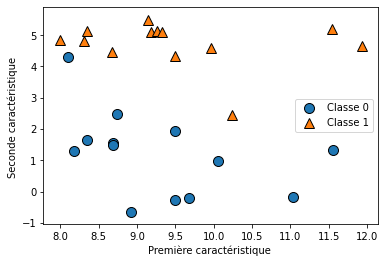

In [2]:
X,y = mglearn.datasets.make_forge()
mglearn.discrete_scatter(X[:,0],X[:,1],y)
plt.legend(["Classe 0", "Classe 1"], loc=5)
plt.xlabel("Première caractéristique ")
plt.ylabel("Seconde caractéristique ")
print("X.shape : {}".format(X.shape))
print("y.shape : {}".format(y.shape))

X.shape : (40, 1)
y.shape : (40,)


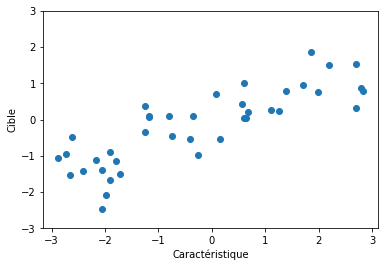

In [3]:
X,y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X,y,'o')
plt.ylim(-3,3)
plt.xlabel("Caractéristique")
plt.ylabel("Cible")
print("X.shape : {}".format(X.shape))
print("y.shape : {}".format(y.shape))

## Jeu de données réelles.

- Déterminer si une tumeur est cancéreuse ou pas à partir de données cliniques : **classification**
- Déterminer la valeur moyenne de maisons dans plusieurs quartiers de Boston dans les années 1970 à partir de différentes informations : **régression**


In [4]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print("cancer.keys() : {}".format(cancer.keys()))
print("Shape des données du cancer : {} ".format(cancer.data.shape))
print("Dénombrement des classes : \n{}".format({
n: v for n,v in zip(cancer.target_names,np.bincount(cancer.target))
}))

cancer.keys() : dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
Shape des données du cancer : (569, 30) 
Dénombrement des classes : 
{'malignant': 212, 'benign': 357}


In [5]:
# Affichage des caractéristiques
print("Caractéristiques : \n{}".format(cancer.feature_names))

Caractéristiques : 
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [6]:
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [7]:
from sklearn.datasets import load_boston
boston = load_boston()
print("Data shape du jeu de données Boston : {}".format(boston.data.shape))

Data shape du jeu de données Boston : (506, 13)


C:\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.
    :fu

In [8]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

C:\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


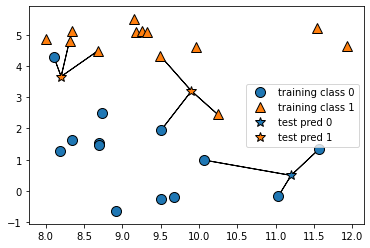

In [9]:
from sklearn.datasets import make_blobs

mglearn.plots.plot_knn_classification(n_neighbors=3)

C:\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


Etiquettes prédites : [1 0 1 0 1 0 0] / Etiquettes réelles : [1 0 1 0 1 1 0]
Pourcentage de réussite : 0.86


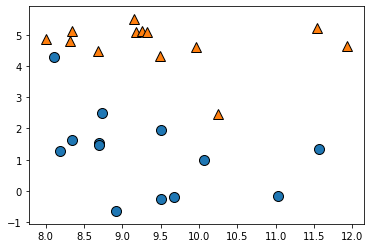

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import pylab as pl

X,y = mglearn.datasets.make_forge()
X_train , X_test, y_train, y_test = train_test_split(X,y, random_state=0)

mglearn.discrete_scatter(X[:,0],X[:,1],y)
clf = KNeighborsClassifier(n_neighbors=3)

clf.fit(X_train,y_train)

print("Etiquettes prédites : {} / Etiquettes réelles : {}".format(
    clf.predict(X_test), y_test)
     )

print("Pourcentage de réussite : {:.2f}".format( clf.score(X_test,y_test) ) )

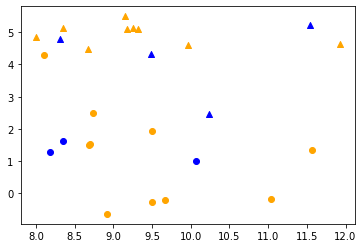

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# Fixing random state for reproducibility
np.random.seed(19680801)

for i in range(len(X_train[:,0])):
    plt.scatter(X_train[i,0],X_train[i,1], marker='o' if y_train[i] == 0 else '^', color = 'orange' )

for i in range(len(X_test[:,0])):
    plt.scatter(X_test[i,0],X_test[i,1], marker='o' if y_test[i] == 0 else '^', color = 'blue' )
    
plt.show()

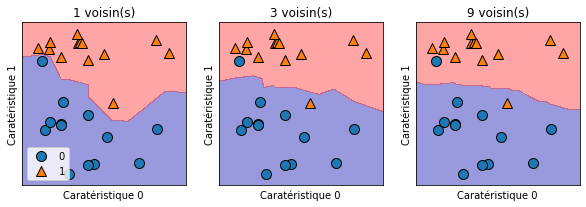

In [12]:
fig, axes = plt.subplots(1,3, figsize=(10,3))
for n_neighbors, ax in zip([1,3,9],axes):
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X,y)
    mglearn.plots.plot_2d_separator(clf,X,fill=True, eps=0.5, ax=ax, alpha =0.4 )
    mglearn.discrete_scatter(X[:,0], X[:,1] , y, ax = ax)
    ax.set_title("{} voisin(s)".format(n_neighbors))
    ax.set_xlabel("Caratéristique 0")
    ax.set_ylabel("Caratéristique 1")
axes[0].legend(loc = 3)
plt.show()

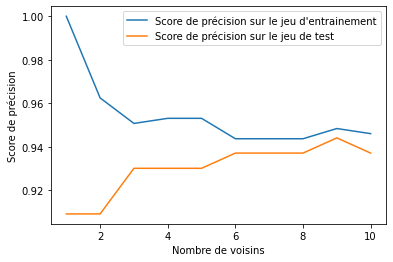

In [13]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train , X_test, y_train, y_test = train_test_split( cancer.data , cancer.target , stratify = cancer.target,
                                                     # random_state=66
                                                    )

training_accuracy = []
test_accuracy = []
neighbors_setting = range(1,11)

for n_neighbors in neighbors_setting:
    clf = KNeighborsClassifier( n_neighbors= n_neighbors)
    clf.fit(X_train,y_train)
    training_accuracy.append(clf.score(X_train,y_train))
    test_accuracy.append(clf.score(X_test,y_test))
    
plt.plot(neighbors_setting, training_accuracy, label = "Score de précision sur le jeu d'entrainement")
plt.plot(neighbors_setting, test_accuracy, label = "Score de précision sur le jeu de test")
plt.ylabel("Score de précision")
plt.xlabel("Nombre de voisins")
plt.legend()

plt.show()

## Régression des k plus proches voisins

### Principe
Déterminer l'ordonnée d'un point d'abscisse donné en considérant les points d'abscisse les plus proche

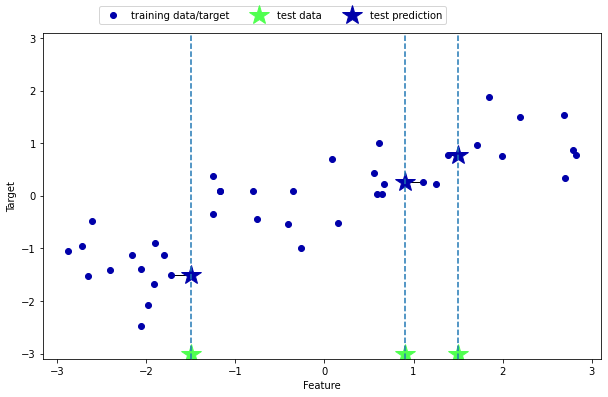

In [14]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

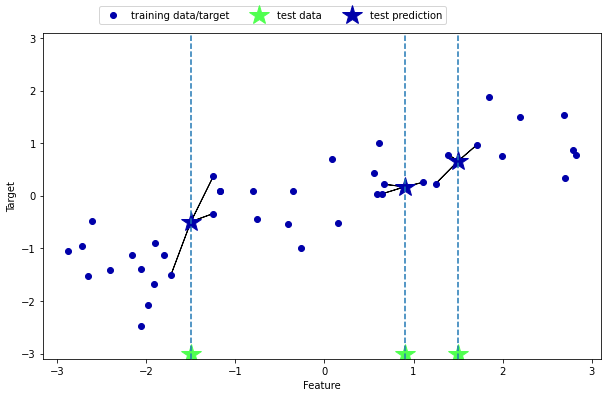

In [15]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

In [16]:
from sklearn.neighbors import KNeighborsRegressor

X,y = mglearn.datasets.make_wave()
# plt.scatter(X,y, marker='o' )
X_train , X_test, y_train, y_test = train_test_split(X,y, random_state=21091981)

reg = KNeighborsRegressor(n_neighbors=3)
reg.fit(X_train,y_train)
print("Ordonnées prédites par le modèle : {}".format(reg.predict(X_test)))
print("Ordonnées réelles : {}".format(y_test))

print("Score R² ou coefficient de détermination : {}".format(reg.score(X_test,y_test)))

Ordonnées prédites par le modèle : [-0.41863093 -0.78872143  1.55516634 -0.36690994 -0.491785   -0.13656371
  1.15118061  0.7256706   1.55516634 -0.50058374  0.23219725 -1.04182329
 -0.8979061  -0.89139875  0.62039438  0.62039438 -1.08568642 -1.04182329
  1.04622517 -0.93703812 -0.2403057  -0.21149307 -0.89296477 -1.40519217
  0.62039438]
Ordonnées réelles : [-0.8991673  -1.54756059  1.57500058 -0.6565562  -0.75159805  0.289108
  1.70897229  0.91757823  1.22856895 -0.48537014 -0.34838379 -0.52425604
 -0.90077433 -0.18621847  0.71057755  0.43219944  0.13915737 -0.5397432
  0.97771746 -0.33342093 -0.11595025 -0.88012364 -1.39417599 -2.2420626
  1.46585765]
Score R² ou coefficient de détermination : 0.723332568490215


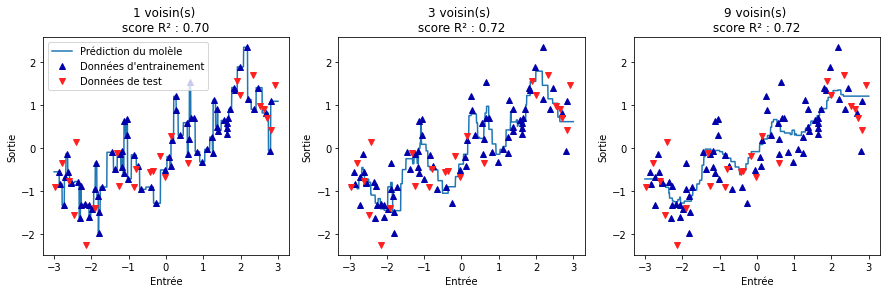

In [17]:
# Analyse de la regression des k-plus proches voisins

fig, axes = plt.subplots(1,3, figsize=(15,4))
line = np.linspace(-3,3,1000).reshape(-1,1)
for n_neighbors, ax in zip([1,3,9],axes):
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train,y_train)
    ax.plot(line,reg.predict(line))
    ax.plot(X_train,y_train, '^', c=mglearn.cm2(0))
    ax.plot(X_test,y_test, 'v', c=mglearn.cm2(1))
    
    ax.set_title("{} voisin(s) \n score R² : {:.2f} ".format(n_neighbors,reg.score(X_test,y_test)))
    ax.set_xlabel("Entrée")
    ax.set_ylabel("Sortie")
axes[0].legend(["Prédiction du molèle","Données d'entrainement", "Données de test"] )
plt.show()

Inconvéniants : 
- Lent
- Difficultés pour gérer beaucoup de données

## Modèles linéaires

w[0]: 0.393906  b: -0.031804


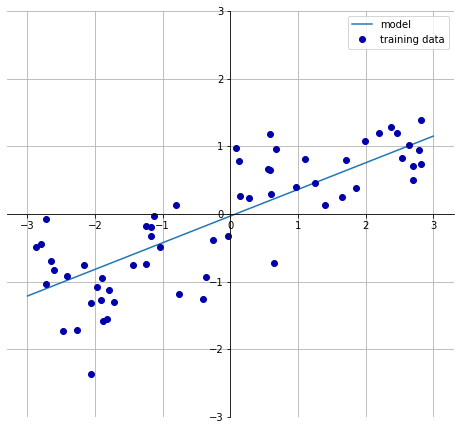

In [18]:
# Moindres carrés (MCO : moindres carrés ordinaires ou OLS ordinary least square)
mglearn.plots.plot_linear_regression_wave()

In [19]:
from sklearn.linear_model import LinearRegression
X,y = mglearn.datasets.make_wave(n_samples=60)
X_train,X_test,y_train,y_test = train_test_split(X,y,
                                                # random_state=42
                                                )
lr = LinearRegression().fit(X_train,y_train)
print(f" le coefficient directeur est de : {lr.coef_[0]:.3f} \n l'ordonnée à l'origine est de : {lr.intercept_:.3f}")
print(f"Score sur le jeu d'entrainement {lr.score(X_train,y_train)}")
print(f"Score sur le jeu de test {lr.score(X_test,y_test)}")

 le coefficient directeur est de : 0.401 
 l'ordonnée à l'origine est de : 0.024
Score sur le jeu d'entrainement 0.6711381571965735
Score sur le jeu de test 0.42918882319469975


In [20]:
# Essai du modèle sur Boston Housing
X,y = mglearn.datasets.load_extended_boston()
X_train,X_test,y_train,y_test = train_test_split(X,y,
                                                # random_state=42
                                                )
lr = LinearRegression().fit(X_train,y_train)

print(f"Score sur le jeu d'entrainement {lr.score(X_train,y_train)}")
print(f"Score sur le jeu de test {lr.score(X_test,y_test)}")

# Problème : le surapprentissage : pour le contrôler on passe sur le modèle régression rigide.

Score sur le jeu d'entrainement 0.9326233786841783
Score sur le jeu de test 0.8746883669259727


C:\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.
    :fu